In [2]:
import numpy as np
from IPython import display
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

In [3]:
# OpenRocketData = pd.read_csv("150 OpenRocket - Updated Wind and Parachute.csv")
OpenRocketData = pd.read_csv("WeatherSimsDataSet-5_21 - Sheet1.csv")

# OpenRocketData.columns

# OpenRocketBallisticData = pd.read_csv("FINAL_ Wind-Altitude Open Rocket Data - Ballistic.csv")
print(OpenRocketData.shape[0]) #500 samples

500


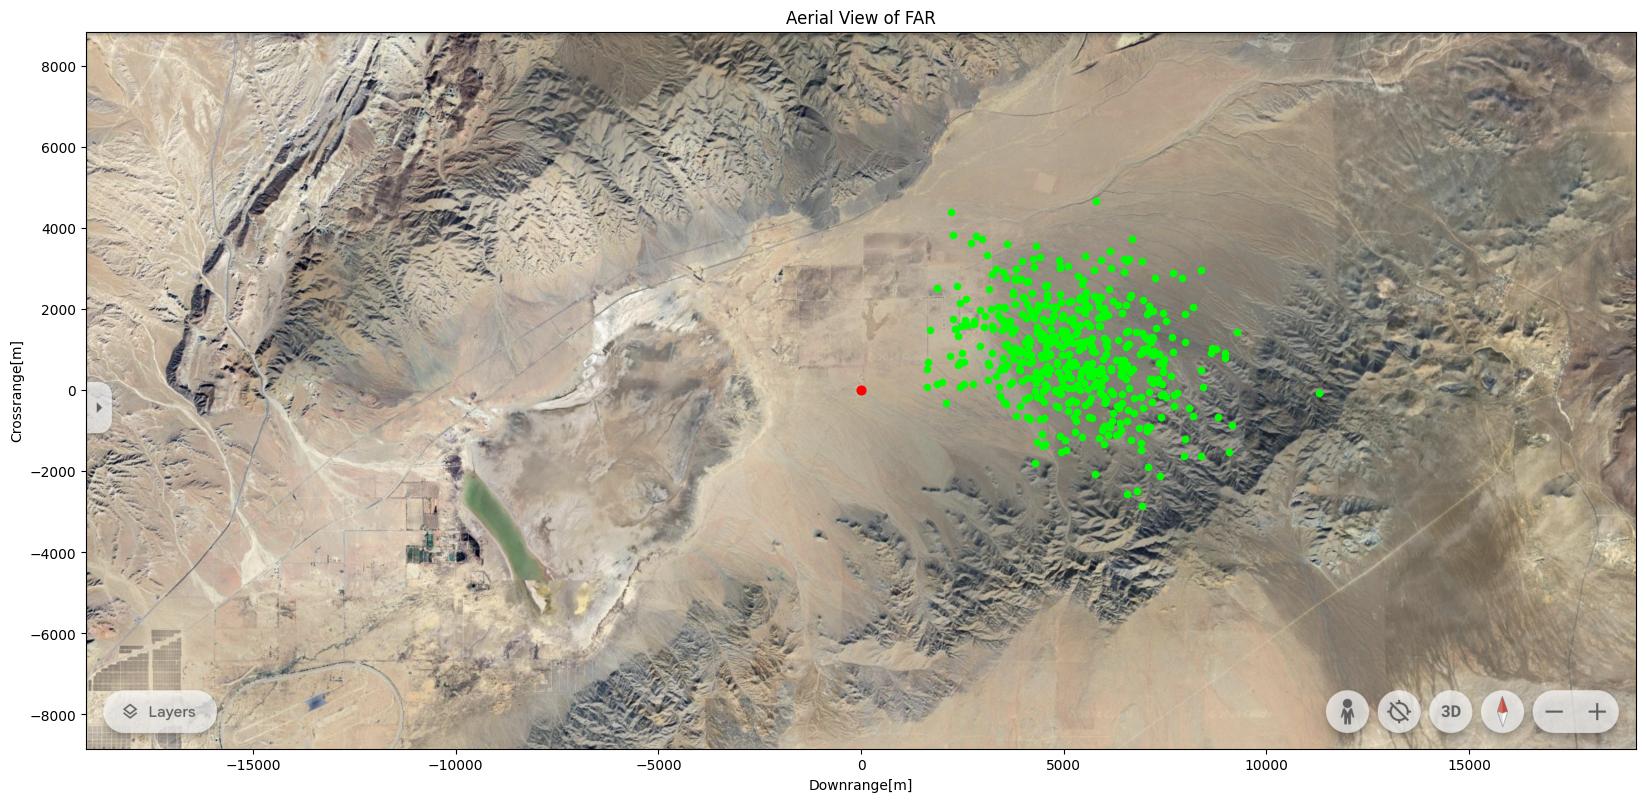

In [7]:
img = mpimg.imread('FAR, 33KM.png') #10 km Camera view

#these lengths came from measuring image in google earth

xLength = 38.24*1000 #length of image, in m
yLength = 17.692*1000

# cx = xLength/2
# cy = yLength/2

parachute = True
if parachute:
    x = OpenRocketData['posEast']
    y = OpenRocketData['posNorth']
else:
    x = OpenRocketBallisticData['posEast']
    y = OpenRocketBallisticData['posNorth']


fig = plt.figure(figsize=(20, 10))


plt.imshow(img, extent=(-xLength/2,xLength/2,-yLength/2,yLength/2))

plt.scatter(x,y , c='lime', s=20) #Far launch site
plt.scatter(0,0 , c='red', s=40) #Far launch site

plt.xlabel('Downrange[m]') #adjust coordinates
plt.ylabel('Crossrange[m]') #adjust coordinates
plt.title("Aerial View of FAR")


#E2 
# plt.scatter(-2800,1400 , c='green', s=40) #Far launch site
# E2_x, E2_y =-2250.982,	1531.188 #Launch rail angle, 4 degrees north. Speed = 6 m/s, Dir = 247.5
# E2x_2, E2_y2 = -2224.424,	-910.051 #Launch rail angle, 0 degrees north. Speed = 6 m/s, Dir = 247.5
# plt.scatter(E2_x,E2_y , c='purple', s=40) 
# plt.scatter(E2x_2,E2_y2 , c='yellow', s=40) #Far launch site


# plt.grid(visible = True)


plt.show()

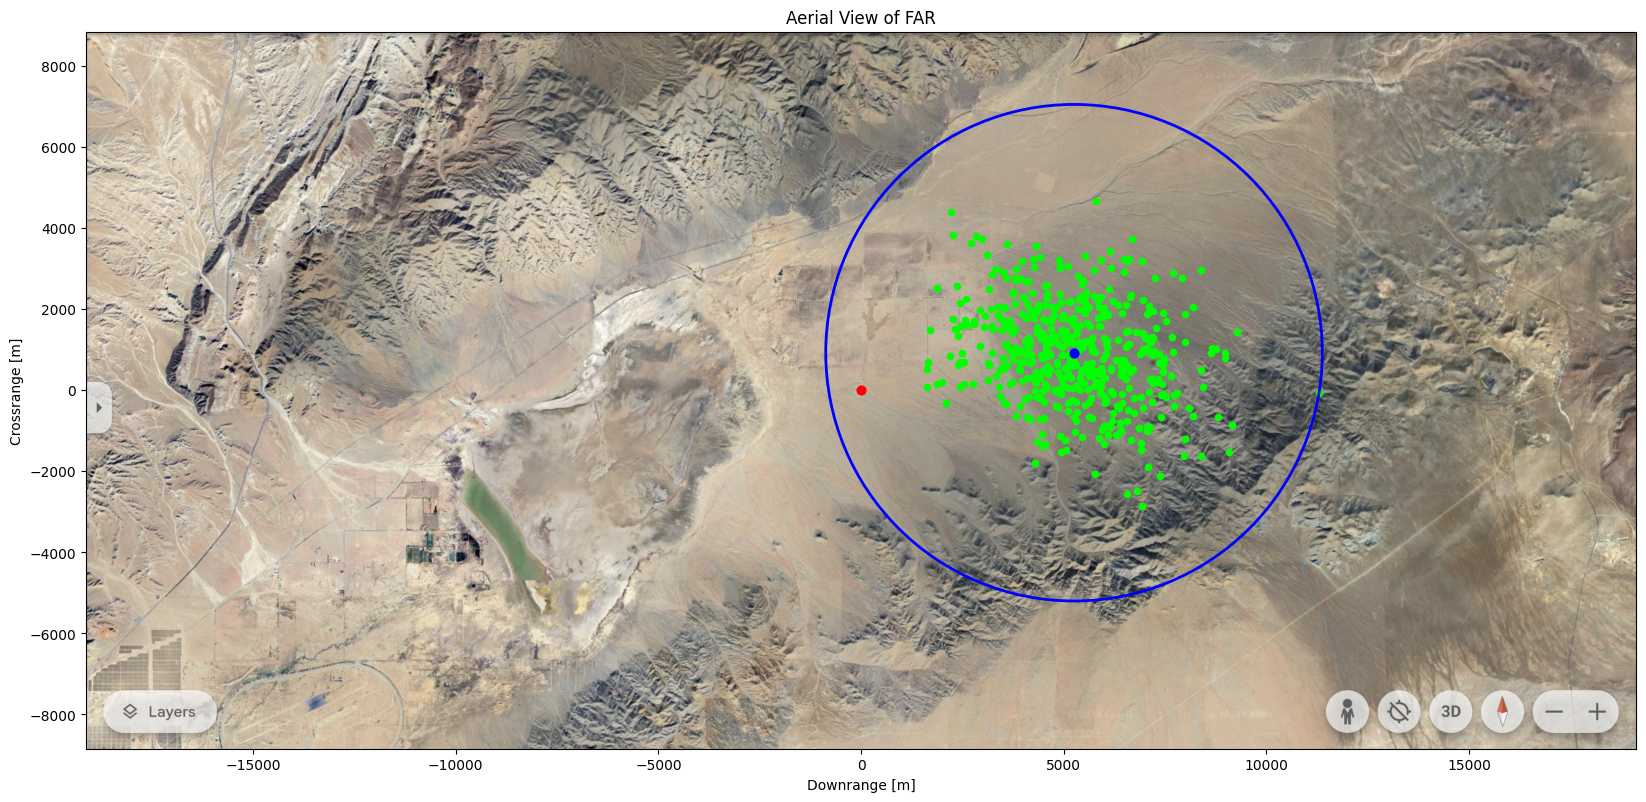

In [11]:
#circle for points

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Circle
import numpy as np

img = mpimg.imread('FAR, 33KM.png')
xLength = 38.24 * 1000  # length of image, in m
yLength = 17.692 * 1000

parachute = True
if parachute:
    x = OpenRocketData['posEast']
    y = OpenRocketData['posNorth']
else:
    x = OpenRocketBallisticData['posEast']
    y = OpenRocketBallisticData['posNorth']

fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(img, extent=(-xLength/2, xLength/2, -yLength/2, yLength/2))

# Plotting the points
ax.scatter(x, y, c='lime', s=20)  # Far launch site
ax.scatter(0, 0, c='red', s=40)  # Center point

# Calculate centroid ie center of the points
centroid_x = np.mean(x)
centroid_y = np.mean(y)
ax.scatter(centroid_x, centroid_y, c='blue', s=40, zorder=5)  # Centroid dot

# Calculate the radius for the encompassing circle
radius = np.max(np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2))

circle = Circle((centroid_x, centroid_y), radius, color='blue', fill=False, lw=2, zorder=4)
ax.add_patch(circle)
ax.set_xlabel('Downrange [m]')
ax.set_ylabel('Crossrange [m]')
ax.set_title("Aerial View of FAR")

plt.show()

Open rocket sample data average and SD
3.7247755767176343
2.5191940615391215
empirical data average and SD
3.783622577134177
2.562816907722947


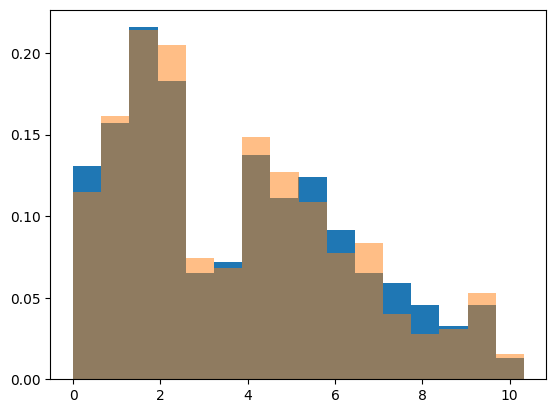

In [12]:
#Validation of wind speed
originalSpeedData = pd.read_csv("Far March Weather.csv")


conversion = 0.44704 #mph to meter per second
plt.hist( x = originalSpeedData['wind avg mph']*conversion, bins = 16, density = True) #empircal data
plt.hist(data= OpenRocketData, x = 'Avg windspeed', bins = 16, density = True, alpha = 0.5)

# originalSpeedData['wind avg']*conversion

print('Open rocket sample data average and SD')
print(np.mean(OpenRocketData['Avg windspeed']))
print(np.std(OpenRocketData['Avg windspeed']))

print('empirical data average and SD')
print( np.mean(originalSpeedData['wind avg mph']*conversion))
print( np.std(originalSpeedData['wind avg mph']*conversion))

In [13]:
#General Data anlysis on results
avg_dist = np.sqrt(x**2+y**2)
print(avg_dist)

0      7508.843406
1      4485.204928
2      5319.998466
3      5347.496392
4      6151.086744
          ...     
495    4603.759075
496    3596.749755
497    2531.722797
498    6442.653782
499    5581.596985
Length: 500, dtype: float64


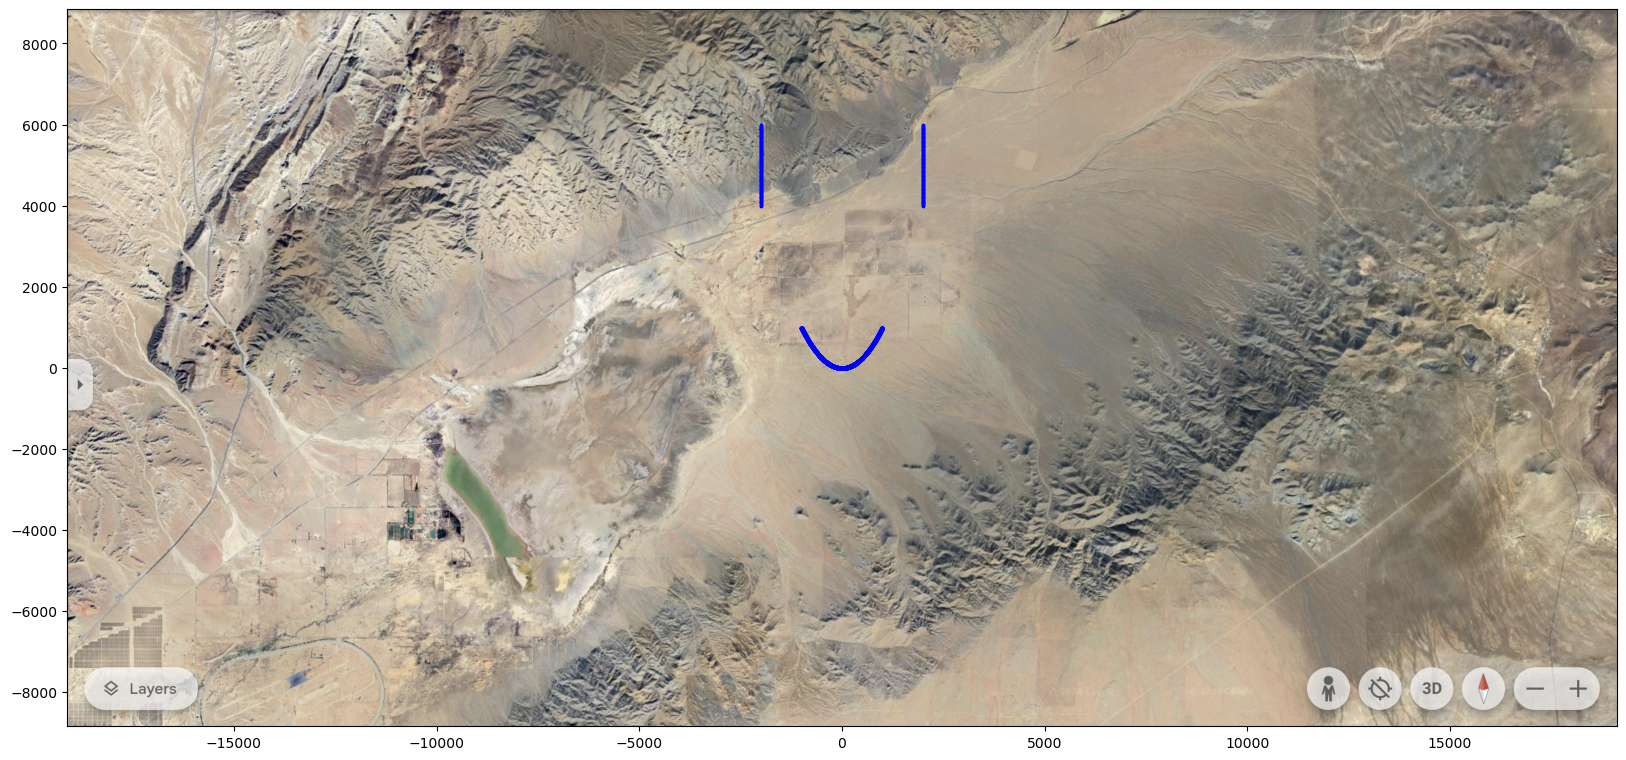

In [6]:
#smile

fig = plt.figure(figsize=(20, 10))
plt.imshow(img, extent=(-xLength/2,xLength/2,-yLength/2,yLength/2) )


 #Make first eye
y_eye1 = np.arange(4000, 6000, 20)
x_eye1 = np.ones(len(y_eye1))*-2000
plt.scatter(x_eye1,y_eye1 , c='blue', s=3)

 #Make second eye
y_eye2 = np.arange(4000, 6000, 20)
x_eye2 = np.ones(len(y_eye1))*2000
plt.scatter(x_eye2,y_eye2 , c='blue', s=3)

x_mouth = np.arange(-1000, 1000)
y_mouth = 1/1000*x_mouth**2-10
plt.scatter(x_mouth,y_mouth , c='blue', s=3)
